## Movement of basin boundary of Stommel model

Import packages:

In [2]:
import numpy as np
from numpy.polynomial import Polynomial as pol
from matplotlib import pyplot as plt
import matplotlib as mpl

Import own modules:

In [3]:
import import_ipynb
from COSMETICS import *
from SETUP import f, J

importing Jupyter notebook from COSMETICS.ipynb
importing Jupyter notebook from SETUP.ipynb


In [4]:
plt.rc('font',**{'family':'sans-serif', 'sans-serif':['Arial'], 'size':16})

In [5]:
def type_of_eq(S_, T_, e3, sgn, lst=True):
    '''Obtain type of equilibrium'''
    (l1, l2) = J(S_, T_, e3)
    if abs(l1.imag) < 1e-5:
        if l1*l2 < 0:
            return('S')
        else:
            if (l1>0 and l2 > 0):
                return('uN')
            else:
                return('sN')
        
    else:
        if l1.real > 0:
            return('uF')
        else:
            return('sF')

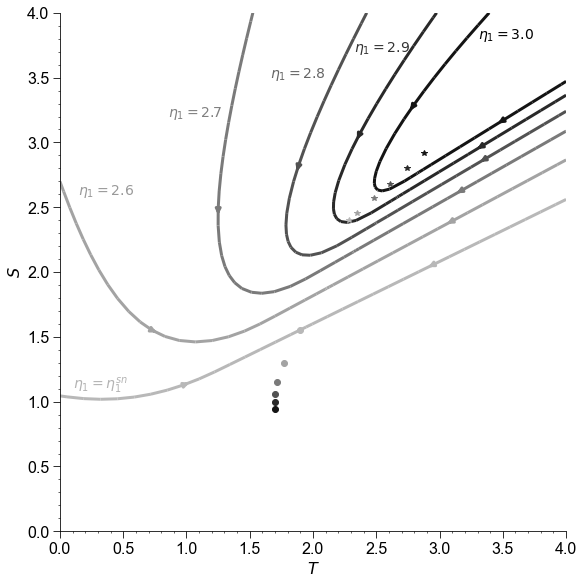

In [6]:
e2 = 1
e3 = 0.3

e1_sn = 2.549292519519159

ngrid = 300
T_ = np.linspace(0, 4, ngrid)
S_ = np.linspace(0, 4, ngrid)
plt.figure(figsize=(8, 8))
lw = 3

frac = 4/5

for e1 in [e1_sn+1e-15, 2.6, 2.7, 2.8, 2.9, 3.0]:

    dT_ = np.zeros((ngrid, ngrid))
    dS_ = np.zeros((ngrid, ngrid))

    for i in range(ngrid):
        for j in range(ngrid):
            dT_[j][i] = e1 - T_[i]*(1+abs(T_[i]-S_[j]))
            dS_[j][i] = e2 - S_[j]*(e3+np.abs(T_[i]-S_[j]))

    for pt in f(e1, e2, e3):
        if type_of_eq(pt[0], pt[1], e3, sgn=(pt[1]-pt[0])/abs(pt[1]-pt[0])) == 'sF':
             plt.plot(pt[1], pt[0], 'o', marker='*', color=str(frac*max(int(60-20*e1)/10, 0.1)))

        if type_of_eq(pt[0], pt[1], e3, sgn=(pt[1]-pt[0])/abs(pt[1]-pt[0])) == 'sN':
            plt.plot(pt[1], pt[0], 'o', color=str(frac*max(int(60-20*e1)/10, 0.1)))

        if type_of_eq(pt[0], pt[1], e3, sgn=(pt[1]-pt[0])/abs(pt[1]-pt[0])) == 'S':
            seed_points = np.array([[pt[1]-0.0005], [pt[0]-0.0005]])
            seed_points2 = np.array([[pt[1]], [pt[0]]])
            plt.streamplot(T_, S_, dT_, dS_, start_points=seed_points.T, color=str((max(int(60-20*e1)/10, 0.1))*frac), linewidth=lw, integration_direction='backward')
            plt.streamplot(T_, S_, dT_, dS_, start_points=seed_points2.T, color=str((max(int(60-20*e1)/10, 0.1))*frac), linewidth=lw, integration_direction='backward')

            
plt.text(0.1, 1.1, '$\eta_1=\eta_1^{sn}$', color = '0.7', weight = 'bold', size=14)
plt.text(0.14, 2.6, '$\eta_1=2.6$', color = '0.6', weight = 'bold', size=14)
plt.text(0.85, 3.2, '$\eta_1=2.7$', color = '0.5', weight = 'bold', size=14)
plt.text(1.66, 3.5, '$\eta_1=2.8$', color = '0.4', weight = 'bold', size=14)
plt.text(2.32, 3.7, '$\eta_1=2.9$', color = '0.2', weight = 'bold', size=14)
plt.text(3.3, 3.8, '$\eta_1=3.0$', color = '0', weight = 'bold', size=14)

plt.xlabel('$T$')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.ylabel('$S$')
plt.show()